Introduction to Data Science
Programming Exercise: 03
Name: Tran Thi Bich Tuyen
Student ID: 21280059


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import seaborn as sns

In [3]:
#Đọc file dữ liệu
url = "https://raw.githubusercontent.com/hduc-le/Introduction-to-data-science/main/datasets/Consumo_cerveja.csv"
beer = pd.read_csv(url, delimiter=",")
beer.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900


In [8]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


In [7]:
#Hệ số tương quan là thước đo mối liên hệ tuyến tính giữa hai biến và nằm trong khoảng từ -1 đến +1
beer.corr()
#Ta thấy được rằng Temperatura Maxima có giá trị cao nhất là 0.64267 cho thấy mối quan hệ của nó và Consumo de cerveja tốt hơn
#so với các thuộc tính khác, tiếp đó là Temperatura Media và Final de Semana

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


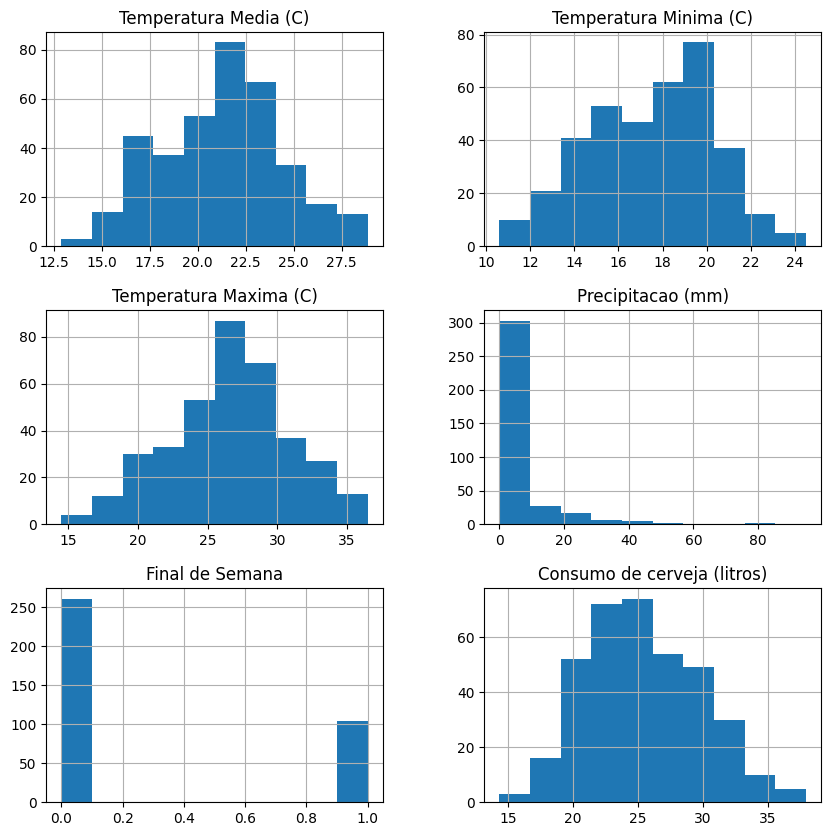

In [13]:
beer.hist(figsize=(10,10))
plt.show()

In [14]:
#Chọn cột feature và target
X = beer[['Temperatura Media (C)', 'Temperatura Maxima (C)','Final de Semana']].values
y = beer['Consumo de cerveja (litros)'].values

In [15]:
# tách dữ liệu thành tập train và tập test với tỷ lệ 80% cho tập train và 20% cho tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0 )

In [16]:
#Transforming data bằng MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LINEAR REGESSION


In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# hệ số hồi quy tuyến tính được ước lượng bởi mô hình
regressor.coef_

array([-1.64047529, 16.18319982,  5.0558344 ])

In [8]:
regressor.intercept_

15.856158510417792

In [18]:
#dự đoán kết quả trên tập huấn luyện X_train và lưu kết quả dự đoán vào biến train_pred.
train_pred_linear = regressor.predict(X_train)
#dự đoán kết quả trên tập kiểm tra X_test 
test_pred_linear = regressor.predict(X_test)

In [19]:
#Đánh giá hiệu suât mô hình Linear Regession
lr_mse=mean_squared_error(y_test,test_pred_linear)
lr_rmse=np.sqrt(lr_mse)
lr_mae=mean_absolute_error(y_test,test_pred_linear)
lr_r2 = r2_score(y_test,test_pred_linear)

LASSO REGRESSION


In [40]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [12]:
# Hệ số hồi qui
print("Coef: ", lasso.coef_)

Coef:  [ 0.         12.18793082  4.55510692]


In [13]:
print("Intecept: ", lasso.intercept_)

Intecept:  17.323259265437933


In [41]:
#Dự đoán kết quả trên tập train và test
train_pred_lasso = lasso.predict(X_train)
test_pred_lasso = lasso.predict(X_test)

In [42]:
#Đánh giá hiệu suất mô hình
lasso_mse = mean_squared_error(y_test,test_pred_linear)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, test_pred_lasso)
lasso_r2 = r2_score(y_test, test_pred_lasso)

RIDGE REGESSION

In [44]:
ridge_reg = Ridge(alpha=0.1)
# huấn luyện model
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [17]:
# Hệ số hồi qui
print("Coef: ", ridge_reg.coef_)

Coef:  [-0.77601565 15.24272034  5.04876717]


In [18]:
print("Intercept: ", ridge_reg.intercept_)

Intercept:  15.923744846936312


In [45]:
#dự đoán giá trị trên tập huấn luyện
train_pred_ridge = ridge_reg.predict(X_train)
test_pred_ridge = ridge_reg.predict(X_test)

In [46]:
#đánh giá hiệu suât mô hình
ridge_mse = mean_squared_error(y_test, test_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, test_pred_ridge)
ridge_r2 = r2_score(y_test, test_pred_ridge)

Đánh giá mô hình nào là tốt nhất trong 3 mô hình Linear Regression, Lasso Regression, Ridge Regression

In [47]:
#Các giá trị đánh giá mô hình

#Linear Regression
print("Linear Regression:")
print("MSE =", lr_mse)
print("RMSE =", lr_rmse)
print("MAE =", lr_mae)
print("R-squared =", lr_r2)
print()

#Lasso Regression
print("Lasso:")
print("MSE =", lasso_mse)
print("RMSE =", lasso_rmse)
print("MAE =", lasso_mae)
print("R-squared =", lasso_r2)
print()

#Ridge Regrsession
print("Ridge:")
print("MSE =", ridge_mse)
print("RMSE =", ridge_rmse)
print("MAE =", ridge_mae)
print("R-squared =", ridge_r2)


Linear Regression:
MSE = 6.57837701862513
RMSE = 2.5648346961597994
MAE = 2.1508792746498338
R-squared = 0.6292591627675056

Lasso:
MSE = 6.57837701862513
RMSE = 2.5648346961597994
MAE = 2.2084017077766958
R-squared = 0.5976584127232114

Ridge:
MSE = 6.597643402476032
RMSE = 2.5685878226130465
MAE = 2.1503277270808843
R-squared = 0.6281733576731635


+MSE (Mean Squared Error): Đây là độ đo đánh giá sai số trung bình bình phương giữa giá trị dự đoán và giá trị thực tế. MSE càng thấp thì mô hình dự đoán càng tốt.

+RMSE (Root Mean Squared Error): RMSE là căn bậc hai của MSE, cho biết sai số trung bình cần bao nhiêu đơn vị đơn vị để phân biệt giữa giá trị dự đoán và giá trị thực tế. RMSE càng thấp thì mô hình dự đoán càng tốt.

+MAE (Mean Absolute Error): Đây là độ đo đánh giá sai số trung bình tuyệt đối giữa giá trị dự đoán và giá trị thực tế. MAE càng thấp thì mô hình dự đoán càng tốt.

*Dựa trên các chỉ số đánh giá, mô hình tốt nhất là Linear Regression. Đây là lí do:

    +MSE, RMSE và MAE của Linear Regression đều thấp hơn so với Lasso và Ridge, cho thấy mô hình Linear Regression có tính chính xác cao hơn khi dự đoán giá trị đầu ra.

    +R-squared của Linear Regression là cao nhất (0.629), cho thấy tỷ lệ phương sai giải thích bởi mô hình là lớn nhất so với hai mô hình còn lại.

    +Đồng thời, vì các mô hình này đều được huấn luyện trên cùng tập dữ liệu và các chỉ số đánh giá được tính trên tập kiểm tra (test set), nên kết quả đánh giá mô hình có tính khách quan hơn.